```
About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution
through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and
convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they
want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


Problem Statement

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands
```

In [35]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [36]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [37]:
# Check the number of entries
print(len(data))

10886


In [38]:
# Determine the structure of the given data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [39]:
#to check the summary statistics
print(data.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [40]:
# Check for missing values
print(data.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [67]:
# Check the timeframe of all values taken
data['datetime'] = pd.to_datetime(data['datetime'])

print("The earliest entry is from", min(data['datetime']))
print("The latest entry is from", max(data['datetime']))

data['datetime'].max() - data['datetime'].min()

The earliest entry is from 2011-01-01 00:00:00
The latest entry is from 2012-12-19 23:00:00


Timedelta('718 days 23:00:00')

In [41]:
# Convert categorical variables to 'category' to optimize memory usage and enable smoother analysis
data['season'] = data['season'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weather'] = data['weather'].astype('category')

These values give an insight about the central tendency, spread and range of numerical values

In [42]:
np.round(data['season'].value_counts(normalize = True) * 100, 2)

season
4    25.11
2    25.11
3    25.11
1    24.67
Name: proportion, dtype: float64

In [43]:
np.round(data['holiday'].value_counts(normalize = True) * 100, 2)

holiday
0    97.14
1     2.86
Name: proportion, dtype: float64

In [44]:
np.round(data['workingday'].value_counts(normalize = True) * 100, 2)

workingday
1    68.09
0    31.91
Name: proportion, dtype: float64

In [45]:
np.round(data['weather'].value_counts(normalize = True) * 100, 2)

weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: proportion, dtype: float64

[]

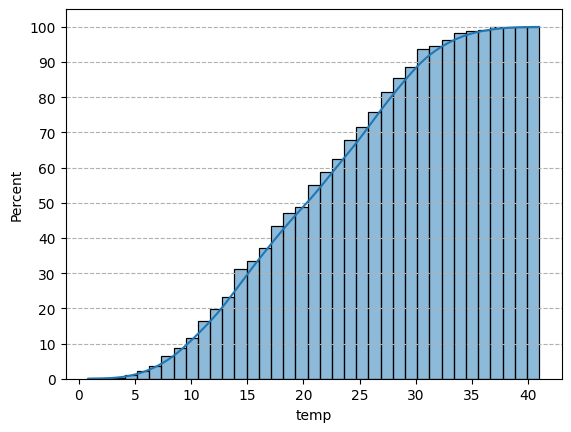

In [46]:
sns.histplot(data = data, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()

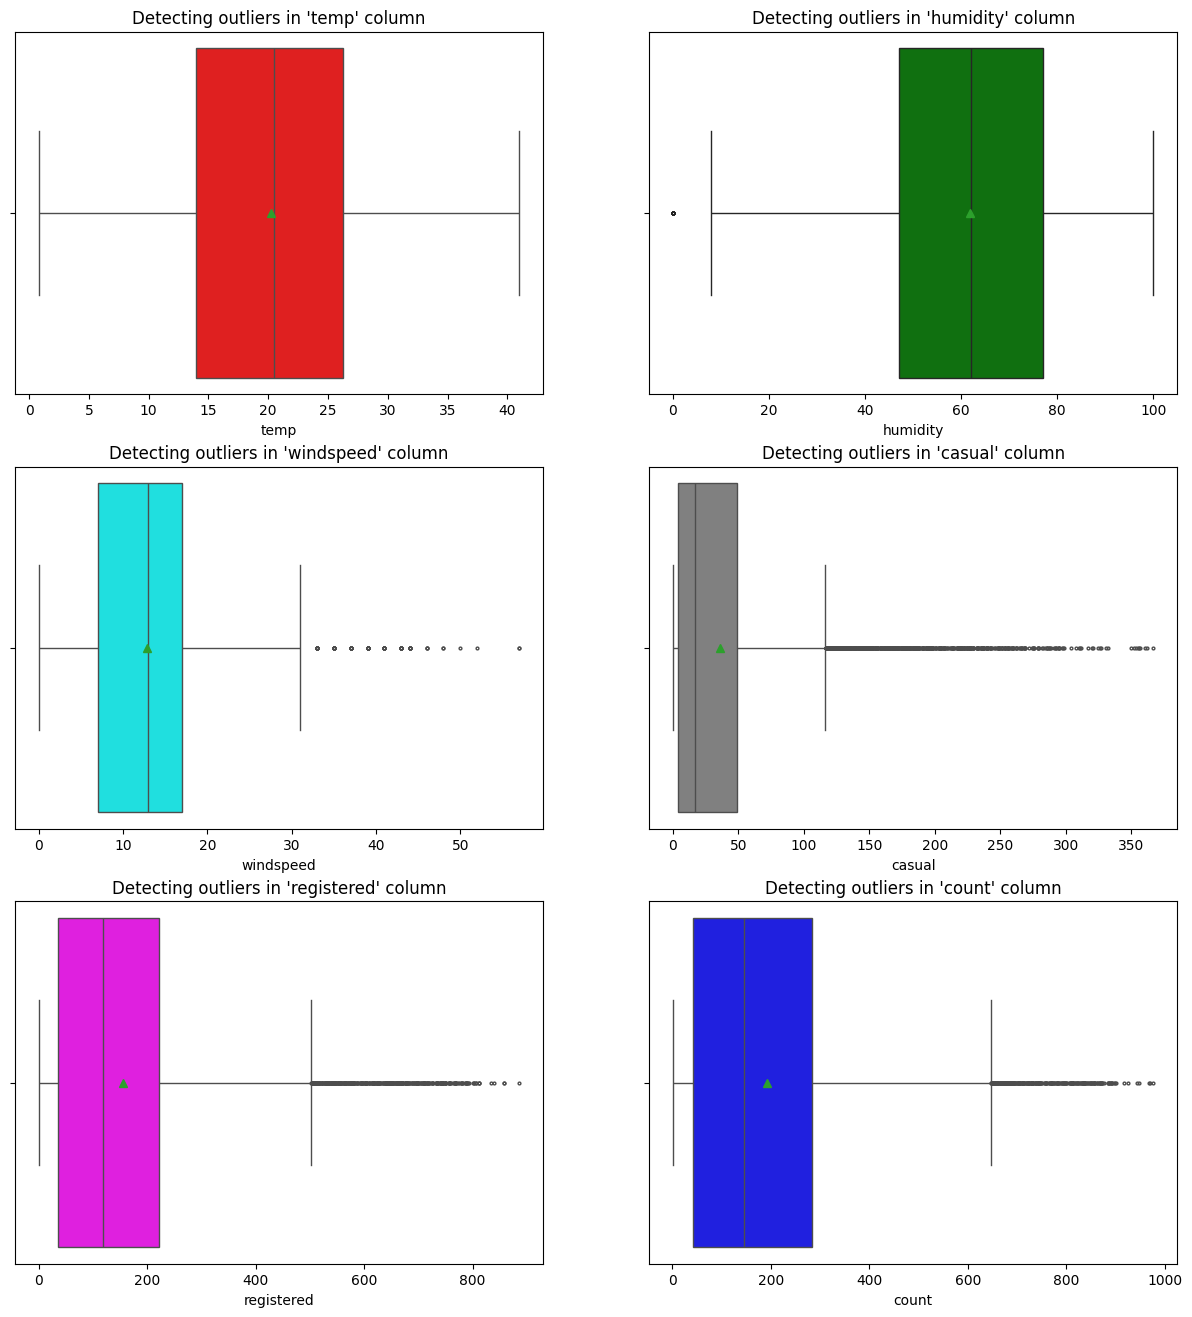

In [47]:
# Detecting outliers

columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = data, x = data[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

[]

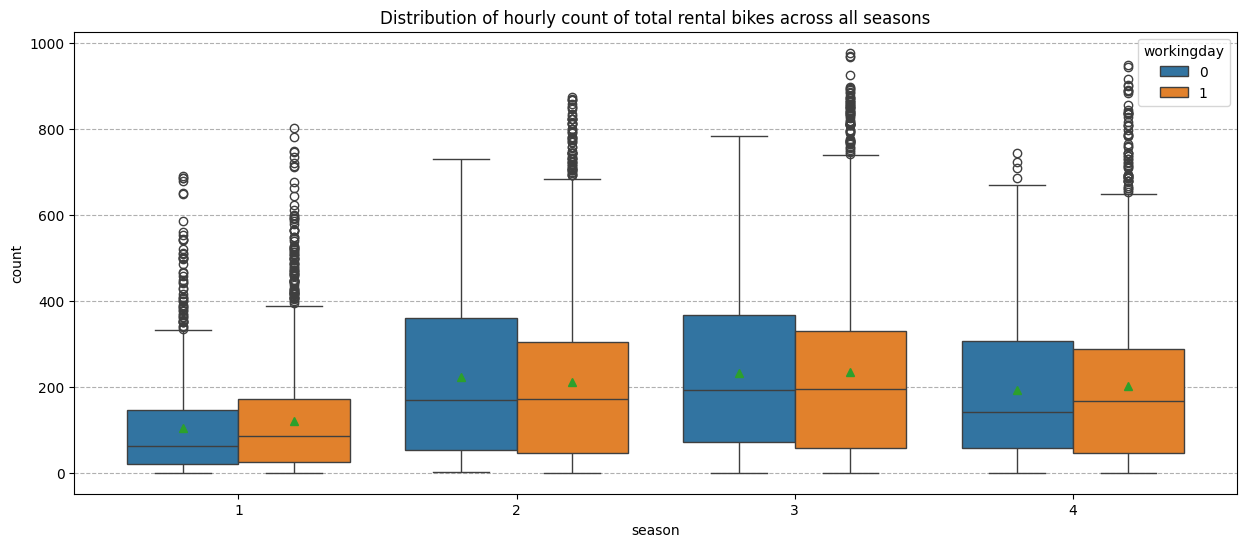

In [48]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons')
sns.boxplot(data = data, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

In [49]:
# Univariate analysis

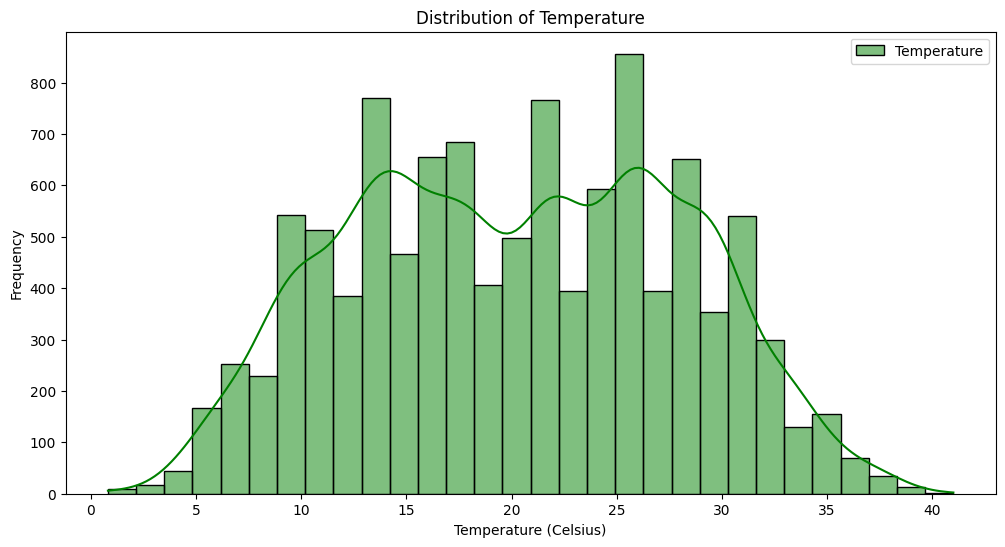

In [50]:
# Distribution plots of continuous variables

plt.figure(figsize=(12, 6))
sns.histplot(data['temp'], kde=True, bins=30, color='green', label='Temperature')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<ipython-input-51-e4e33fd8c45e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['season'], palette='pastel')


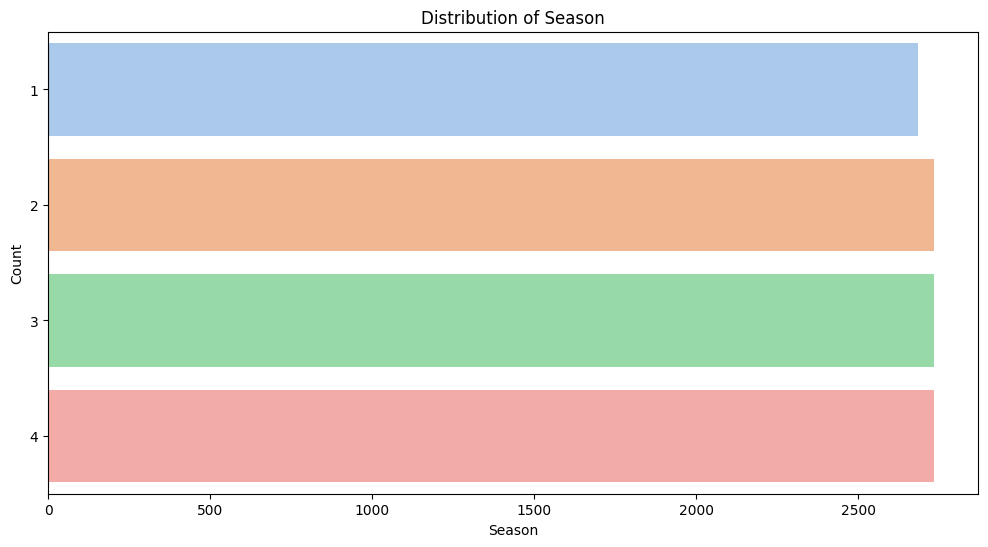

In [51]:
# Barplots/countplots of categorical variables

plt.figure(figsize=(12, 6))
sns.countplot(data['season'], palette='pastel')
plt.title('Distribution of Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

In [52]:
# Bivariate Analysis

<ipython-input-53-cd2281df32b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='count', data=data, palette='Set2')


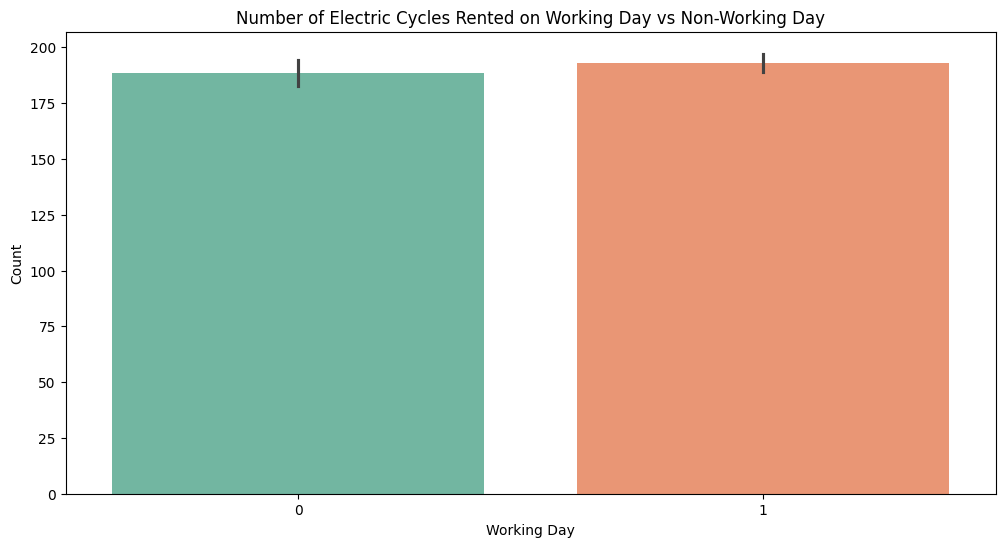

In [53]:
# Relationships between important variables

plt.figure(figsize=(12, 6))
sns.barplot(x='workingday', y='count', data=data, palette='Set2')
plt.title('Number of Electric Cycles Rented on Working Day vs Non-Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

<ipython-input-54-19dabbea4587>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='count', data=data, palette='Set3')


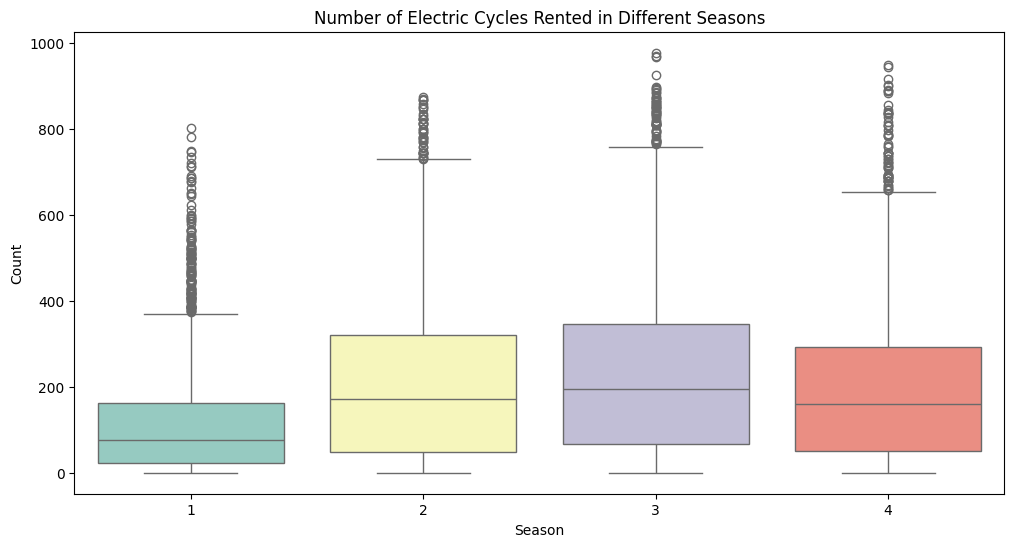

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='count', data=data, palette='Set3')
plt.title('Number of Electric Cycles Rented in Different Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

<ipython-input-55-8f167b7ea03b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='count', data=data, palette='Set1')


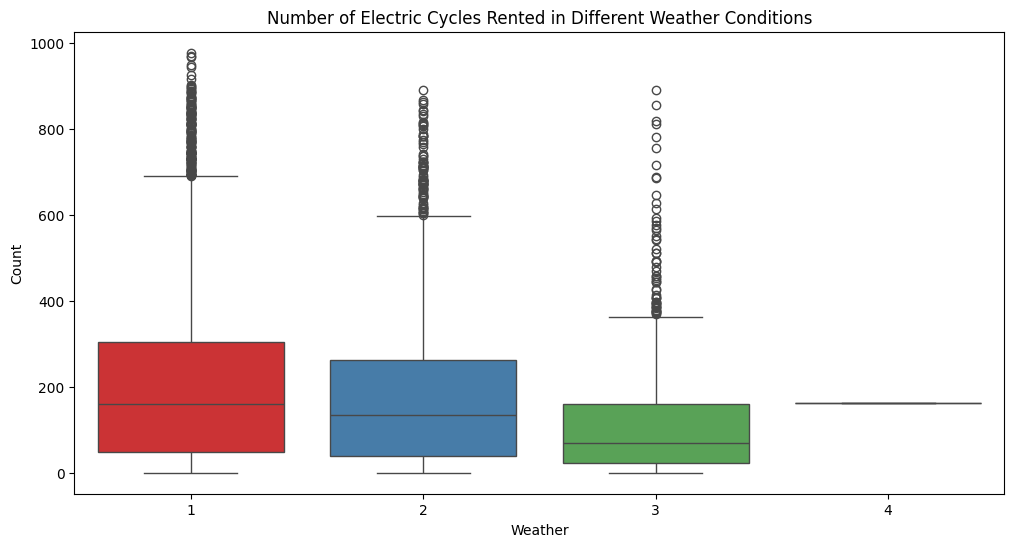

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='count', data=data, palette='Set1')
plt.title('Number of Electric Cycles Rented in Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

In [56]:
# HYPOTHESIS TESTING

In [57]:
# 2 sample T-Test

# Split data into working day and non-working day
working_day = data[data['workingday'] == 1]['count']
non_working_day = data[data['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_value = ttest_ind(working_day, non_working_day)

# Print p-value
print("P-value for 2-Sample T-Test:", p_value)

P-value for 2-Sample T-Test: 0.22644804226361348


```
Null Hypothesis (H0): There is no significant difference in the number of electric cycles rented on working days compared to non-working days.
Alternate Hypothesis (H1): There is a significant difference in the number of electric cycles rented on working days compared to non-working days.

Since P-value > 0.05, we fail to reject null hypothesis
```

In [58]:
# ANOVA

In [59]:
# Perform ANOVA for weather
weather_groups = [data[data['weather'] == i]['count'] for i in data['weather'].unique()]
weather_anova = f_oneway(*weather_groups)

# Print p-value for weather ANOVA
print("P-value for ANOVA (Weather):", weather_anova.pvalue)

P-value for ANOVA (Weather): 5.482069475935669e-42


```
Null Hypothesis (H0): The number of cycles rented is similar across different weather conditions.
Alternate Hypothesis (H1): The number of cycles rented differs across different weather conditions.

Since P-value > 0.05, we fail to reject the null hypothesis.
```

In [60]:
# Perform ANOVA for season
season_groups = [data[data['season'] == i]['count'] for i in data['season'].unique()]
season_anova = f_oneway(*season_groups)

# Print p-value for season ANOVA
print("P-value for ANOVA (Season):", season_anova.pvalue)

P-value for ANOVA (Season): 6.164843386499654e-149


```
Null Hypothesis (H0): The number of cycles rented is similar across different seasons.
Alternate Hypothesis (H1): The number of cycles rented differs across different seasons.

Since P-value > 0.05, we fail to reject the null hypothesis.
```

In [64]:
# Chi-square Test

# Create contingency table for weather and season
weather_season_table = pd.crosstab(data['weather'], data['season'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(weather_season_table)

# Print p-value for Chi-square test
print("P-value for Chi-square Test:", p)

P-value for Chi-square Test: 1.5499250736864862e-07


```
Null Hypothesis (H0): Weather is independent of the season.
Alternate Hypothesis (H1): Weather is dependent on the season.

Since P-value > 0.05, we fail to reject the null hypothesis.
```

```
Insights:

1. Data spans from January 1, 2011, to December 19, 2012, totaling 718 days and 23 hours.
2. Out of every 100 users, approximately 19 are casual and 81 are registered.
3. There's a notable annual growth rate of 65.41% in the hourly demand for rental bikes, increasing from 144 in 2011 to 239 in 2012.
4. Seasonal trends show higher demand during spring and summer, followed by a decline in fall and winter.
5. January, February, and March exhibit the lowest average hourly bike counts.
6. Throughout the day, there's a distinct fluctuation in bike counts, peaking in the afternoon.
7. Temperature is mostly below 28°C, humidity is generally above 40%, and windspeeds are mostly below 20.
8. Clear and cloudy weather conditions witness the highest bike rentals, with few records for extreme weather.
9. The mean hourly bike count remains statistically similar for both working and non-working days.
10. Weather and season significantly impact bike rentals, with different weather conditions leading to varied rental counts.
11. There's no significant dependency of weather on season for certain weather conditions.
12. Bike rentals vary significantly across different seasons.
```
```
Recommendations:

1. Capitalize on seasonal trends by adjusting marketing strategies and offering seasonal discounts.
2. Implement time-based pricing to balance demand throughout the day.
3. Launch weather-based promotions targeting favorable weather conditions.
4. Tailor marketing approaches for registered and casual users.
5. Optimize inventory based on seasonal demand patterns.
6. Improve data collection for extreme weather conditions.
7. Enhance customer comfort with amenities and collaborations with weather services.
8. Prioritize seasonal bike maintenance to ensure optimal fleet condition.
9. Solicit customer feedback to drive service improvements.
10. Utilize social media for targeted marketing and engagement.
11. Offer special discounts on environmental awareness days to attract new users.
```

